In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Import Libraries from Keras Fashion Mnist

In [2]:
from keras.datasets import fashion_mnist

(train_X,train_Y),(test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.
/home/sachin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sachin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sachin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sachin/.local/lib/python3.6/site-packages/tensorflow/python

In [22]:
train_X

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [3]:
import numpy as np
from keras.utils  import to_categorical
import  matplotlib.pyplot as plt
%matplotlib inline

In [4]:
print("Training Data Shape :: ",train_X.shape , train_Y)

Training Data Shape ::  (60000, 28, 28) [9 0 0 ... 3 0 5]


In [5]:
print("Testing Data Shape :: ",test_X.shape,test_Y)

Testing Data Shape ::  (10000, 28, 28) [9 2 1 ... 8 1 5]


In [6]:
print("Total Number of Outcomes :: ", len(np.unique(train_Y)))
print("Target Outcomes          :: ",np.unique(train_Y))

Total Number of Outcomes ::  10
Target Outcomes          ::  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

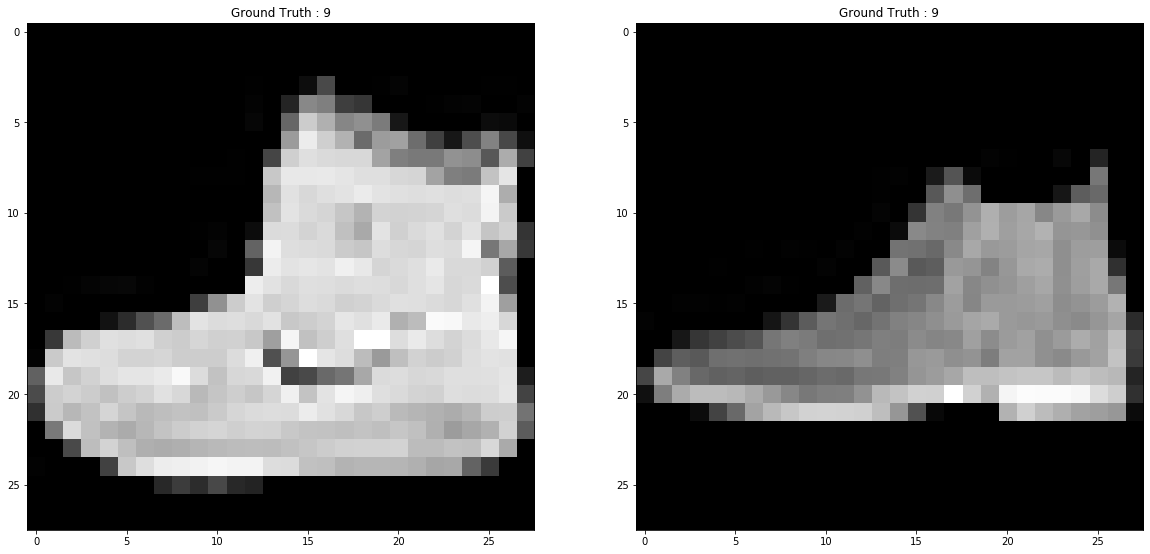

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

### Reshape 28*28 pixels to column vectors.

In [8]:
train_X = train_X.reshape(-1,28,28,1)

In [9]:
train__X = train_X.astype("float32")

In [10]:
train_X = test_X.astype("float32")

## Data preprocessing

In [11]:
## All the feature vectors are in the range of 0-255 so we must normalize them within the range of 0-1 
## for better results and algorithmic operations
train_X = train__X/255
test_X = test_X/255

In [12]:
# we have 60k training samples of (28*28) and 1 target variable of range (0-9)
# we must perform one hot encoding on categorical target column for better results
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [13]:
## check the shape of test_Y and train_Y now 
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Break training set to Training and validation to check overfitting of the model before applying to Test data

In [14]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2,random_state=13)

In [15]:
print("Train_X sample shape:: ",train_X.shape)
print("Train_lable sample shape:: ",train_label.shape)
print("\n")
print("Validation_X sample shape:: ",valid_X.shape)
print("Validation_lable sample shape:: ",valid_label.shape)

Train_X sample shape::  (48000, 28, 28, 1)
Train_lable sample shape::  (48000, 10)


Validation_X sample shape::  (12000, 28, 28, 1)
Validation_lable sample shape::  (12000, 10)


### Model the Data

In [16]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [17]:
batch_size = 64
epochs = 20
num_classes = 10
input_shape = (None,28,28,1)

In [18]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [19]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [20]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 97s 2ms/step - loss: 0.6036 - acc: 0.7747 - val_loss: 0.3754 - val_acc: 0.8574
Epoch 2/20
48000/48000 [==============================] - 86s 2ms/step - loss: 0.3785 - acc: 0.8612 - val_loss: 0.3117 - val_acc: 0.8819
Epoch 3/20
48000/48000 [==============================] - 92s 2ms/step - loss: 0.3274 - acc: 0.8782 - val_loss: 0.2849 - val_acc: 0.8925
Epoch 4/20
48000/48000 [==============================] - 99s 2ms/step - loss: 0.2992 - acc: 0.8882 - val_loss: 0.2629 - val_acc: 0.8994
Epoch 5/20
48000/48000 [==============================] - 90s 2ms/step - loss: 0.2835 - acc: 0.8948 - val_loss: 0.2489 - val_acc: 0.9070
Epoch 6/20
48000/48000 [==============================] - 98s 2ms/step - loss: 0.2710 - acc: 0.8993 - val_loss: 0.2505 - val_acc: 0.9071
Epoch 7/20
48000/48000 [==============================] - 93s 2ms/step - loss: 0.2562 - acc: 0.9045 - val_loss: 0.2406 - val_acc

In [21]:
fashion_model.build(input_shape)
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________